In [7]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os 

from keras.models import Sequential
from keras.layers import Flatten,Dropout,Dense,Input,GlobalAveragePooling2D,Conv2D,BatchNormalization,Activation,MaxPooling2D
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
from keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
picture_size = 48
folder_path = 'C:/Users/asus/OneDrive/Desktop/projectfinal2025/facedata/facesdata/'

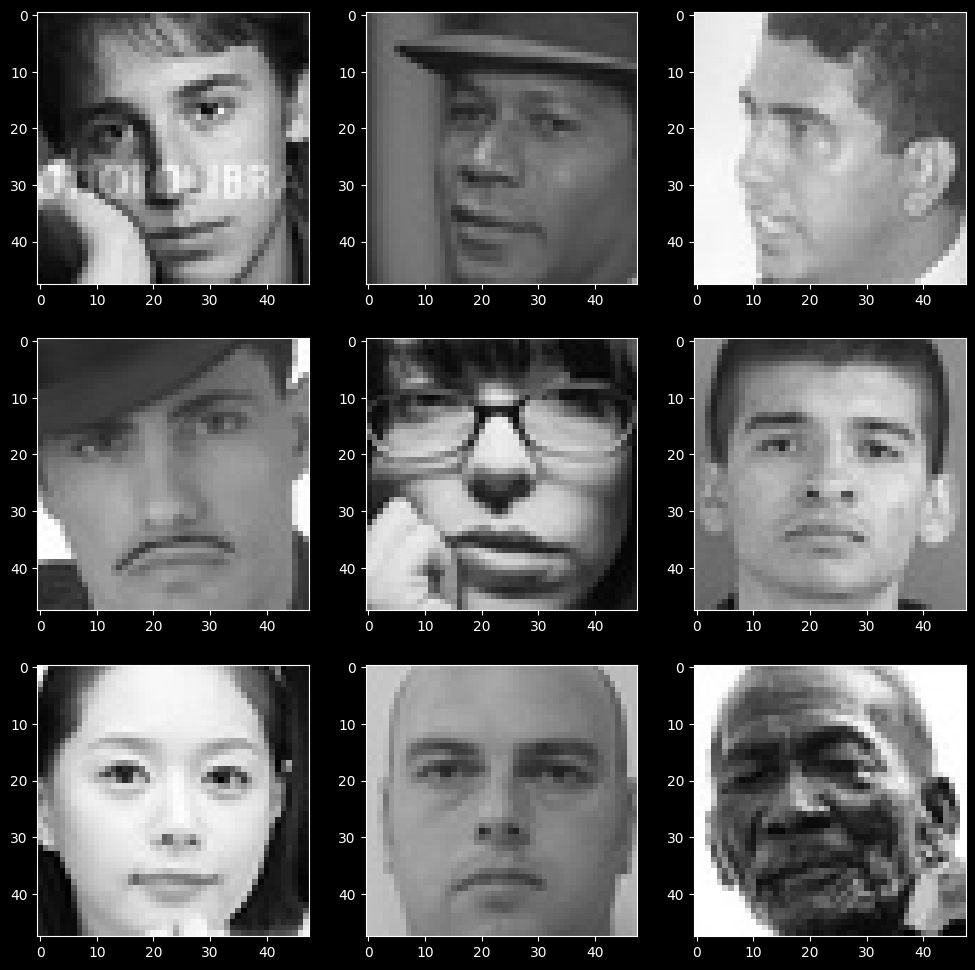

In [9]:
expression = 'nostress'
plt.style.use('dark_background')
plt.figure(figsize=(12,12))
for i in range(1,10,1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"test/"+expression+"/"+ os.listdir(folder_path+"test/"+expression)[i],target_size=(picture_size,picture_size))
    plt.imshow(img)
plt.show() 

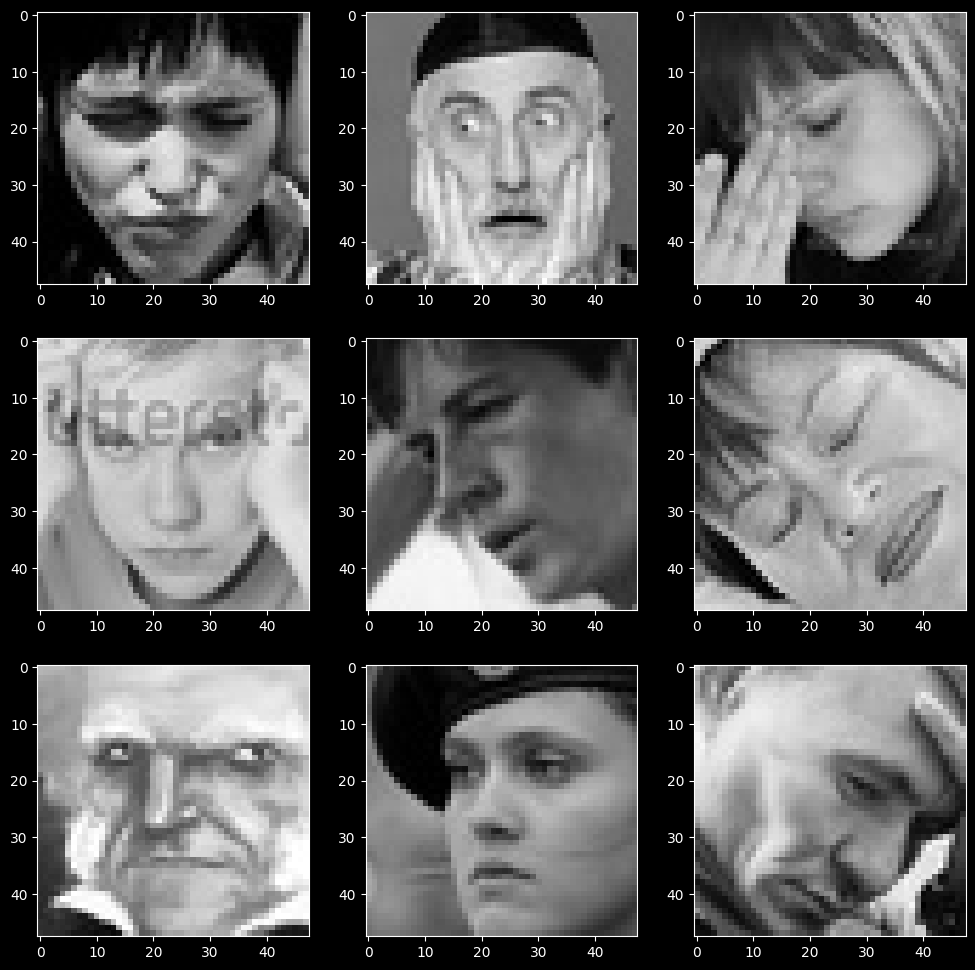

In [10]:
expression = 'stress'
plt.style.use('dark_background')
plt.figure(figsize=(12,12))
for i in range(1,10,1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"test/"+expression+"/"+ os.listdir(folder_path+"test/"+expression)[i],target_size=(picture_size,picture_size))
    plt.imshow(img)
plt.show() 

In [11]:
Batch_size = 128

datagen_train = ImageDataGenerator()
datagen_test = ImageDataGenerator()

train_set = datagen_train.flow_from_directory(folder_path + "train",
                                                 target_size = (picture_size,picture_size),
                                                 color_mode = 'grayscale',
                                                 batch_size = Batch_size,
                                                 class_mode = 'categorical',
                                                 shuffle = True)
test_set = datagen_test.flow_from_directory(folder_path + "test",
                                                 target_size = (picture_size,picture_size),
                                                 color_mode = 'grayscale',
                                                 batch_size = Batch_size,
                                                 class_mode = 'categorical',
                                                 shuffle = True)

Found 9795 images belonging to 2 classes.
Found 2480 images belonging to 2 classes.


In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, MaxPooling2D, Dropout, Flatten, Dense

no_of_classes = 2

model = Sequential()
model.add(Input(shape=(48, 48, 1)))  # Explicit Input layer

# 1st CNN layer
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2nd CNN layer
model.add(Conv2D(128, (5, 5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 3rd CNN layer
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 4th CNN layer
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

# Fully connected 1st Layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))

from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=0.0001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 48, 48, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 24, 24, 128)    │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 12, 12, 512)    │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 12, 12, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 12, 12, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 6, 6, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 256)            │         1,02

 Total params: 4,476,162 (17.08 MB)

 Trainable params: 4,472,194 (17.06 MB)

 Non-trainable params: 3,968 (15.50 KB)

In [17]:
from keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau
checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc',verbose=1,save_best_only=True,mode='max')

early_stopping = EarlyStopping(monitor='val_loss',min_delta=0,patience=3,verbose=1,restore_best_weights=True)

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',factor=0.2,patience=3,verbose=1,min_delta=0.0001)

callbacks_list=[checkpoint,early_stopping,reduce_learningrate]
epochs = 48

In [19]:
history = model.fit(
    test_set,
    steps_per_epoch=test_set.n // test_set.batch_size,
    epochs=epochs,
    validation_data=train_set,
    validation_steps=train_set.n // train_set.batch_size,
    callbacks=callbacks_list
)

c:\Users\asus\OneDrive\Desktop\projectfinal2025\newone\.conda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/48
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.5106 - loss: 0.8613

c:\Users\asus\OneDrive\Desktop\projectfinal2025\newone\.conda\Lib\site-packages\keras\src\callbacks\model_checkpoint.py:302: UserWarning: Can save best model only with val_acc available.
  if self._should_save_model(epoch, batch, logs, filepath):


19/19 ━━━━━━━━━━━━━━━━━━━━ 233s 12s/step - accuracy: 0.5112 - loss: 0.8609 - val_accuracy: 0.5093 - val_loss: 0.7261 - learning_rate: 1.0000e-04
Epoch 2/48
 1/19 ━━━━━━━━━━━━━━━━━━━━ 46s 3s/step - accuracy: 0.4922 - loss: 0.9199

c:\Users\asus\OneDrive\Desktop\projectfinal2025\newone\.conda\Lib\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


19/19 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.4922 - loss: 0.9199 - val_accuracy: 0.5110 - val_loss: 0.7217 - learning_rate: 1.0000e-04
Epoch 3/48
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.5607 - loss: 0.7959

19/19 ━━━━━━━━━━━━━━━━━━━━ 91s 5s/step - accuracy: 0.5607 - loss: 0.7953 - val_accuracy: 0.5162 - val_loss: 0.7427 - learning_rate: 1.0000e-04
Epoch 4/48
 1/19 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.5312 - loss: 0.8372

19/19 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.5312 - loss: 0.8372 - val_accuracy: 0.5154 - val_loss: 0.7372 - learning_rate: 1.0000e-04
Epoch 5/48
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5668 - loss: 0.7664

19/19 ━━━━━━━━━━━━━━━━━━━━ 80s 4s/step - accuracy: 0.5665 - loss: 0.7669 - val_accuracy: 0.5407 - val_loss: 0.6886 - learning_rate: 1.0000e-04
Epoch 6/48
 1/19 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.5938 - loss: 0.7602

19/19 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 0.5938 - loss: 0.7602 - val_accuracy: 0.5408 - val_loss: 0.6899 - learning_rate: 1.0000e-04
Epoch 7/48
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5410 - loss: 0.8210

19/19 ━━━━━━━━━━━━━━━━━━━━ 88s 5s/step - accuracy: 0.5422 - loss: 0.8193 - val_accuracy: 0.5231 - val_loss: 0.7307 - learning_rate: 1.0000e-04
Epoch 8/48
 1/19 ━━━━━━━━━━━━━━━━━━━━ 47s 3s/step - accuracy: 0.5000 - loss: 0.8387


Epoch 8: ReduceLROnPlateau reducing learning rate to 1.9999999494757503e-05.
19/19 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.5000 - loss: 0.8387 - val_accuracy: 0.5252 - val_loss: 0.7251 - learning_rate: 1.0000e-04
Epoch 8: early stopping
Restoring model weights from the end of the best epoch: 5.


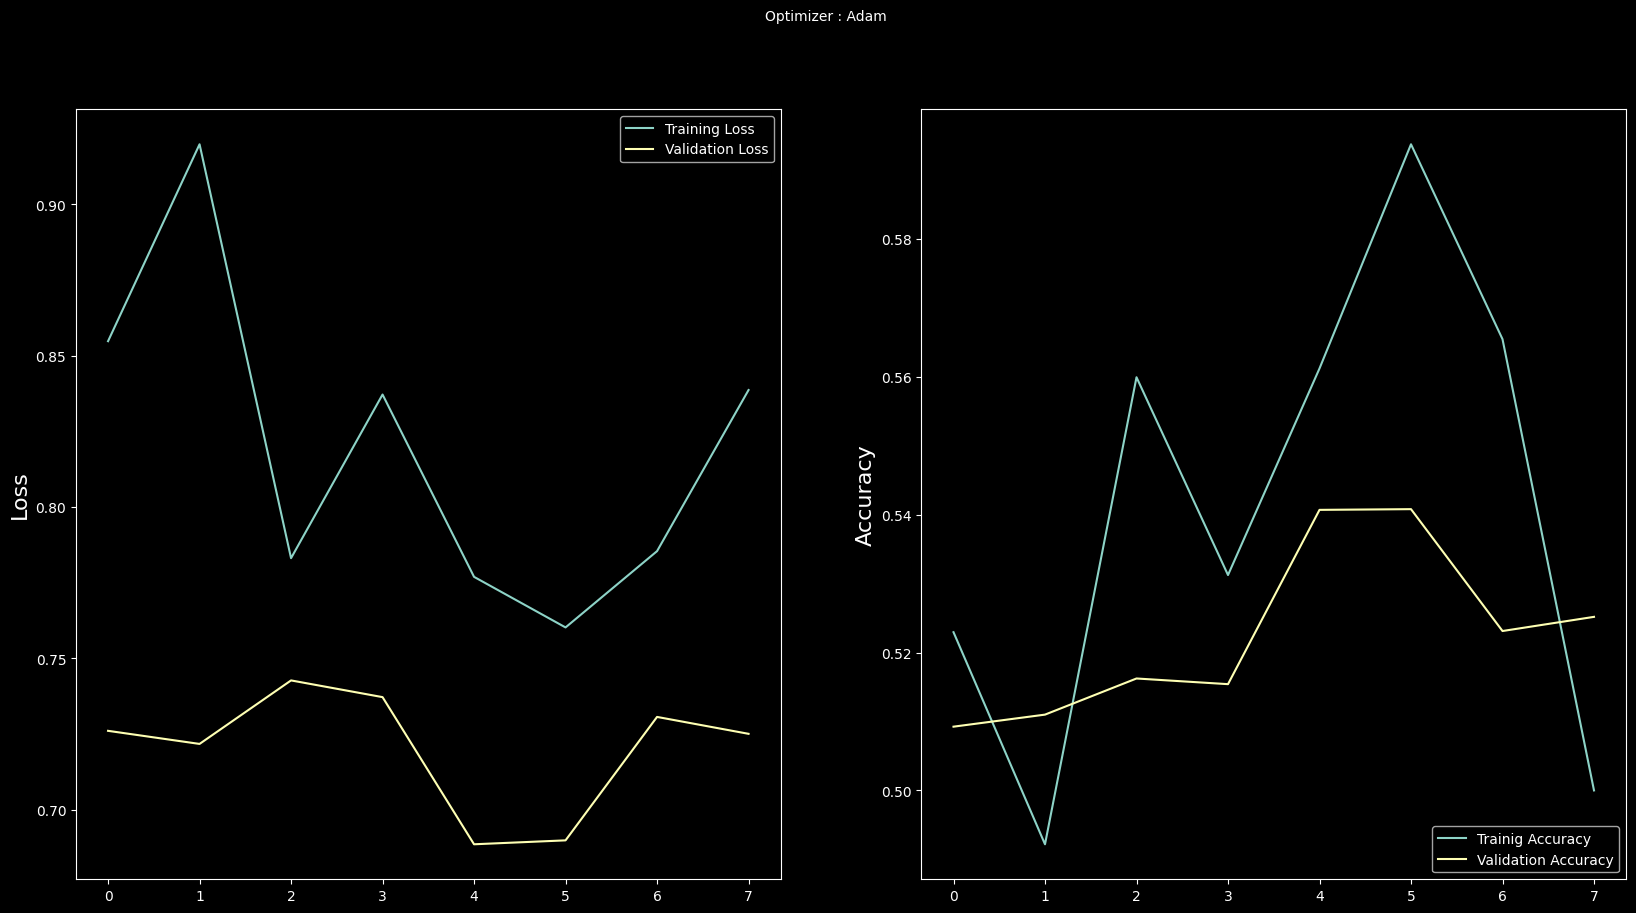

In [20]:
plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.suptitle('Optimizer : Adam', fontsize = 10)
plt.ylabel('Loss',fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1,2,2)
plt.ylabel('Accuracy',fontsize=16)
plt.plot(history.history['accuracy'],label='Trainig Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()